In [24]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Définir les chemins des fichiers
#stanza_file = "APPOLINAIRE_Caligrammes_stanza_entites_candidats.json"  # Fichier de sortie Stanza
#camembert_file = "APPOLINAIRE_Caligrammes_camembert_entites_candidats.json"  # Fichier de sortie Camembert
stanza_file = "tous_entites_nommes_Stanza.json"
camembert_file = "tous_entites_nommes_Camembert.json"
output_dir = "output_intersection_results"  # Répertoire pour enregistrer les résultats d'intersection et de différence

# Assurer que le répertoire de sortie existe
os.makedirs(output_dir, exist_ok=True)

# Charger le fichier Stanza
with open(stanza_file, "r", encoding="utf-8") as f:
    stanza_data = json.load(f)
    # Extraire les entités et candidats de Stanza
    stanza_entites = set([entite['mot'] for entite in stanza_data["entites"]])  # Extraire les mots des entités

# Charger le fichier Camembert
with open(camembert_file, "r", encoding="utf-8") as f:
    camembert_data = json.load(f)
    # Extraire les entités et candidats de Camembert
    camembert_entites = set([entite['mot'] for entite in camembert_data["entites"]])  # Extraire les mots des entités

# Calculer les intersections et les différences
entites_intersection = stanza_entites.intersection(camembert_entites)  # Intersection des entités
entites_diff_stanza = stanza_entites.difference(camembert_entites)  # Différences des entités Stanza
entites_diff_camembert = camembert_entites.difference(stanza_entites)  # Différences des entités Camembert


# Ajouter les résultats dans une liste
intersection_data = [{
    "Fichier": "Tout le corpus",  # Nom du fichier
    "Entites_Intersection": len(entites_intersection),  # Nombre d'entités en intersection
    "Entites_only_in_Stanza": len(entites_diff_stanza),  # Nombre d'entités différentes dans Stanza
    "Entites_only_in_Camembert": len(entites_diff_camembert),  # Nombre d'entités différentes dans Camembert
}]

# Convertir les résultats en DataFrame
df_intersection = pd.DataFrame(intersection_data)

# Afficher les résultats dans la console
#print(df_intersection)
print(tabulate(intersection_data, headers="keys", tablefmt="grid"))

# Sauvegarder les résultats dans un fichier CSV
output_csv_path = os.path.join(output_dir, "intersection_results.csv")
df_intersection.to_csv(output_csv_path, index=False, encoding="utf-8")

# Sauvegarder les résultats dans un fichier Excel, sans spécifier l'argument 'encoding'
output_excel_path = os.path.join(output_dir, "intersection_results.xlsx")
df_intersection.to_excel(output_excel_path, index=False)  # Pas besoin de spécifier 'encoding' pour Excel




+----------------+------------------------+--------------------------+-----------------------------+
| Fichier        |   Entites_Intersection |   Entites_only_in_Stanza |   Entites_only_in_Camembert |
+================+========================+==========================+=============================+
| Tout le corpus |                     93 |                     6956 |                          81 |
+----------------+------------------------+--------------------------+-----------------------------+


<ipython-input-25-ed5d2c1697d6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=df_plot, palette='Set2')


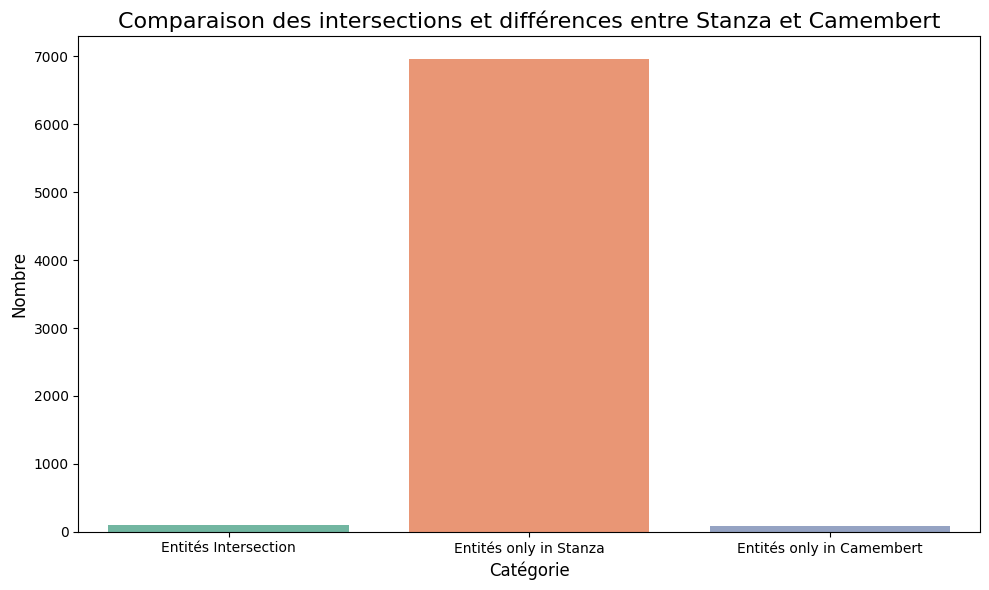

In [25]:
# Créer un graphique pour visualiser les intersections et différences
# Préparer les données pour le graphique
data_for_plot = {
    'Category': ['Entités Intersection', 'Entités only in Stanza', 'Entités only in Camembert'],
    'Count': [
        len(entites_intersection),
        len(entites_diff_stanza),
        len(entites_diff_camembert),
    ]
}

df_plot = pd.DataFrame(data_for_plot)

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df_plot, palette='Set2')

# Ajouter un titre et des labels
plt.title('Comparaison des intersections et différences entre Stanza et Camembert', fontsize=16)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [26]:
pip install matplotlib-venn


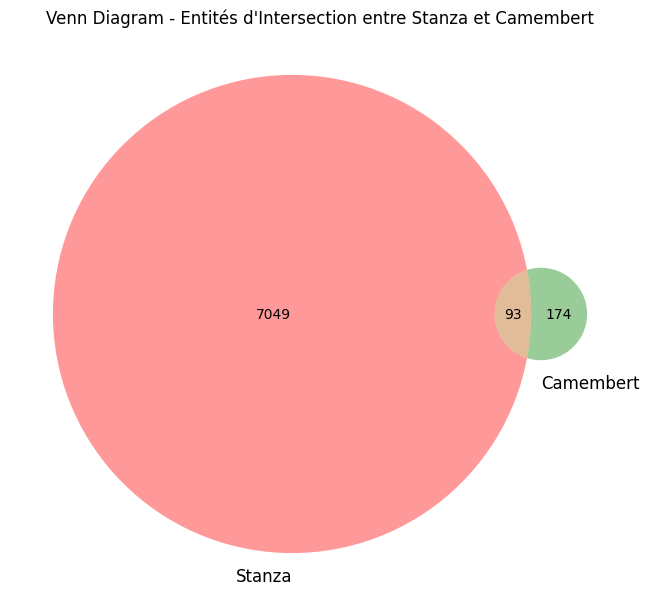

In [27]:
from matplotlib_venn import venn2, venn2_circles  # 导入绘制Venn图的工具

# Créer un graphique de Venn pour visualiser les intersections
plt.figure(figsize=(8, 8))

# Venn pour les entités
venn2(subsets=(len(stanza_entites), len(camembert_entites), len(entites_intersection)),
     set_labels=('Stanza', 'Camembert'))
plt.title("Venn Diagram - Entités d'Intersection entre Stanza et Camembert")

# Afficher le graphique
plt.show()
